In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Clean Data

In [2]:
df = pd.read_csv('./IRIS.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df = df.dropna(how='any',axis=0)

In [5]:
df = df.rename(columns={'sepal_length':'Sepal Length','sepal_width':'Sepal Width','petal_length':'Petal Length',
                        'petal_width':'Petal Width','species':'Species'})

In [6]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

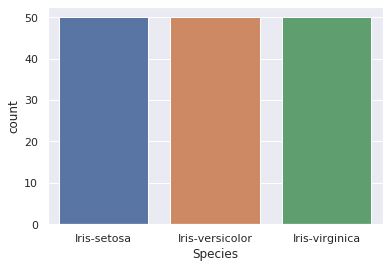

In [7]:
sns.countplot(df['Species'])
flower_type = pd.Series.value_counts(df['Species'])
flower_type

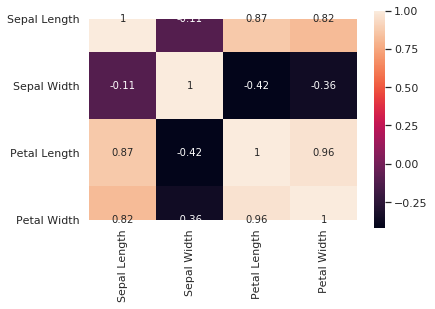

In [8]:
corr = df.corr()
ax = sns.heatmap(corr,square=True,annot = True,)

## PCA Implementation

In [9]:
attributes = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
X = df.loc[:,attributes].values
y = df.loc[:,['Species']].values

#Standardizing X
X = StandardScaler().fit_transform(X)

#Attaining Principal Components
pca1 = PCA(n_components=2)
Pcomponents = pca1.fit_transform(X)
componentDf = pd.DataFrame(data=Pcomponents, columns = ['PC 1','PC 2'])
PCA_df = pd.concat([componentDf, df[['Species']]], axis=1)
print(pca1.explained_variance_ratio_)

[0.72770452 0.23030523]


## Setup for Training Models

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 0)
print(test_X.shape)
print(train_X.shape)

(45, 4)
(105, 4)


In [11]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)
print(train_X.shape)

(105, 4)


In [12]:
pca = PCA(n_components=2)
pca.fit(train_X)
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)
print(pca.explained_variance_ratio_)

[0.71803699 0.24442718]


## Applying K-Means to Trained Data

-27.900078993176045


Text(0.5, 1.0, 'k-means')

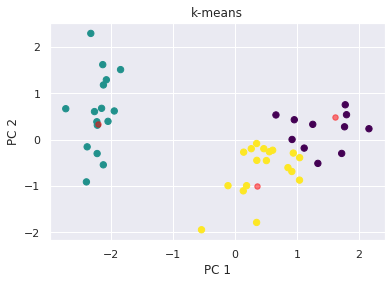

In [13]:
KM = KMeans(n_clusters=3)
KM.fit(train_X,train_y)
KM.predict(test_X)
print(KM.score(test_X,test_y))

plt.scatter(test_X[:, 0], test_X[:, 1], c=KM.predict(test_X), s=40, cmap='viridis')
centers = KM.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='red', s=30, alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('k-means')

## K-Means Clustering for Entire Dataset

(150, 2)
-116.24247259315794


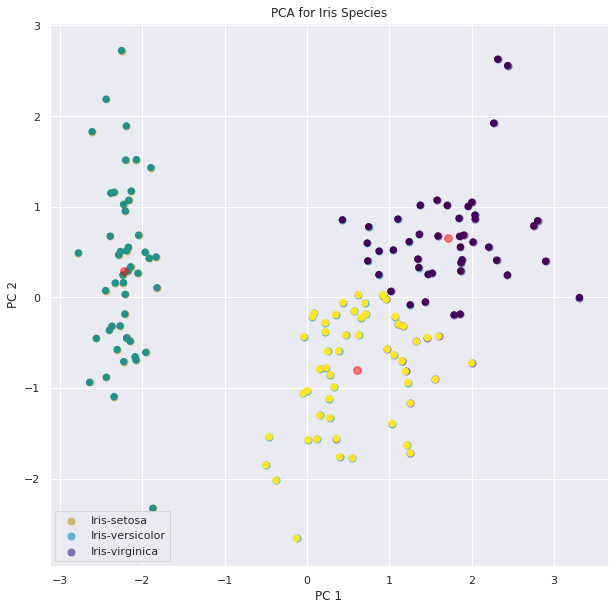

In [14]:
Xpca = PCA_df[['PC 1','PC 2']].values
km = KMeans(n_clusters = 3)
km.fit(Xpca)
labels = km.predict(Xpca)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PCA for Iris Species')

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['y', 'c', 'm']
for iris, color in zip(species,colors):
    keep = PCA_df['Species'] == iris
    ax.scatter(PCA_df.loc[keep, 'PC 1'], PCA_df.loc[keep, 'PC 2'], c = color, s = 50)
ax.legend(species)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=labels, s=40, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='red', s=60, alpha=0.5)


print(Xpca.shape)
print(km.score(Xpca))

##  Applying Mixture of Gaussians to Trained Data

-2.2643680865278943


Text(0.5, 1.0, 'MOG')

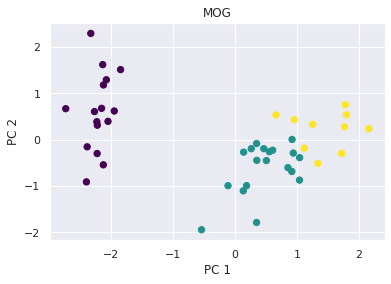

In [15]:
GMM = GaussianMixture(n_components=3,max_iter=100,init_params='kmeans')
GMM.fit(train_X,train_y)
GMM.predict(test_X)
print(GMM.score(test_X,test_y))

plt.scatter(test_X[:, 0], test_X[:, 1], c=GMM.predict(test_X), s=40, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('MOG')

## Mixture of Gaussians for Entire Dataset

-2.5539841028393386


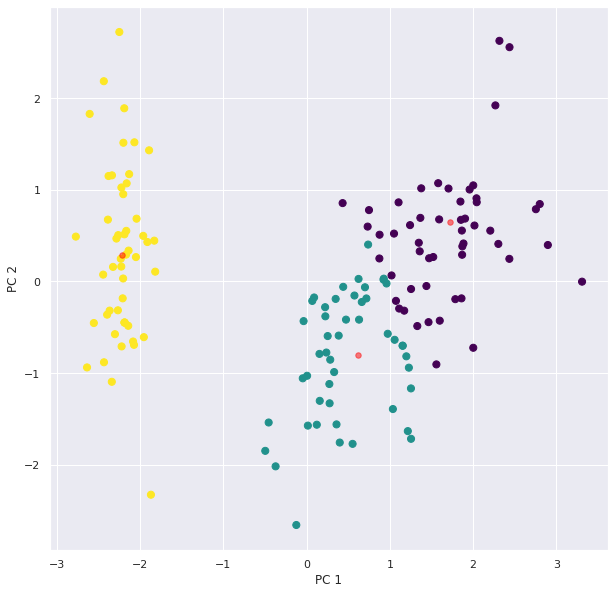

In [16]:
fig = plt.figure(figsize = (10,10))
MoG = GaussianMixture(n_components=3,max_iter=100,init_params='kmeans')
MoG.fit(Xpca)
mlabels = MoG.predict(Xpca)

plt.scatter(Xpca[:,0],Xpca[:,1],c=mlabels,s=50,cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='red', s=30, alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
print(GMM.score(Xpca))

## Applying Spectral Clustering to Trained Data

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'Spectral Clustering')

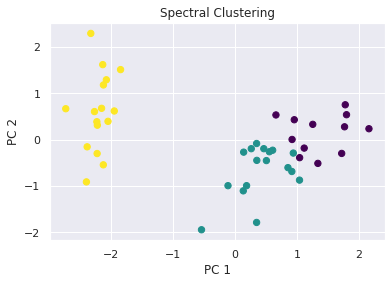

In [17]:
SC = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',random_state=0)
SC.fit_predict(train_X,train_y)

plt.scatter(test_X[:, 0], test_X[:, 1], c=SC.fit_predict(test_X), s=40, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Spectral Clustering')

## Spectral Clustering for Entire Dataset

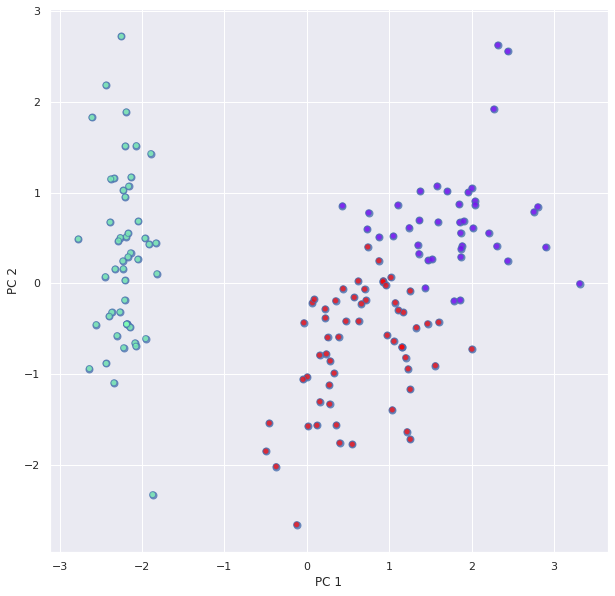

In [18]:
fig = plt.figure(figsize = (10,10))
plt.scatter(Xpca[:,0],Xpca[:,1], alpha=0.7,s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

sc = SpectralClustering(n_clusters=3,affinity='rbf',random_state=0)
sc_clustering = sc.fit(Xpca)
plt.scatter(Xpca[:,0], Xpca[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

## Checking Model Accuracy with Logistic Regression

In [19]:
LogReg = LogisticRegression()
LogReg.fit(train_X,train_y)
y_pred = LogReg.predict(test_X)
print('Training Accuracy:',accuracy_score(test_y,y_pred, normalize=True)*100,'%')
print('Testing Accuracy:',LogReg.score(train_X,train_y)*100,'%')

Training Accuracy: 86.66666666666667 %
Testing Accuracy: 86.66666666666667 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Checking Model Accuracy with KNN

In [20]:
scores = {}
score_list = []
for i in range(1,26):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(train_X,train_y)
    pred_y = KNN.predict(test_X)
    scores[i] = metrics.accuracy_score(test_y,pred_y)
    score_list.append(metrics.accuracy_score(test_y,pred_y))

print('Training Accuracy:',accuracy_score(test_y,pred_y, normalize=True)*100,'%')
print('Testing Accuracy:',KNN.score(train_X,train_y)*100,'%')

Training Accuracy: 88.88888888888889 %
Testing Accuracy: 90.47619047619048 %


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X,train_y)
knn.predict(test_X[0:4])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)